FM/LM connectivity score is measured by: 

- micromobility trip origin/destination counts (scooter, microtransit, bicycle) within 100ft buffer zone at the grouped bus stops.  
- Block level FMLM gap score 


## 1. read and merge scooter  & microtransit data 

In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

df=pd.read_excel('data/Copy of Bird Raw Ride Data 01_01_22-12_31_22.xlsx')

crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df['start_lon'],df['start_lat'])]
scooter1=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

geometry=[Point(xy) for xy in zip(df['end_lon'],df['end_lat'])]
scooter2=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

df=pd.read_csv('data/Veo_Rides.csv')

crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df['LNG_PICKUP'],df['LAT_PICKUP'])]
scooter3=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)


crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df['LNG_DROPOFF'],df['LAT_DROPOFF'])]
scooter4=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

scooter11=scooter1[['end_lat','end_lon']].rename(columns={'end_lat':'lat','end_lon':'lon'})
scooter22=scooter2[['start_lat','start_lon']].rename(columns={'start_lat':'lat','start_lon':'lon'})
scooter33=scooter3[['LAT_PICKUP','LNG_PICKUP']].rename(columns={'LAT_PICKUP':'lat','LNG_PICKUP':'lon'})
scooter44=scooter4[['LAT_DROPOFF', 'LNG_DROPOFF']].rename(columns={'LAT_DROPOFF':'lat','LNG_DROPOFF':'lon'})

dfs=[scooter11,scooter22,scooter33, scooter44]

scooter_df=pd.DataFrame()

scooter_df[['lat','lon']]=gpd.pd.concat([df[['lat','lon']] for df in dfs])

crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(scooter_df['lon'],scooter_df['lat'])]
scooter_merge=gpd.GeoDataFrame(scooter_df,crs=crs,geometry=geometry)

scooter_merge.to_file('process/scooter_merge.shp')

C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initializa

In [12]:
df=pd.read_excel('data/Microtransit O-D Data_08152022_01012023.xlsx')

crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df['origin_longitude'],df['origin_latitude'])]
mcirotransit1=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

geometry=[Point(xy) for xy in zip(df['destination_longitude'],df['destination_latitude'])]
mcirotransit2=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)

mcirotransit11=mcirotransit1[['origin_latitude','origin_longitude']].rename(columns={'origin_latitude':'lat','origin_longitude':'lon'})
mcirotransit22=mcirotransit2[['destination_latitude','destination_longitude']].rename(columns={'destination_latitude':'lat','destination_longitude':'lon'})

dfs=[mcirotransit11,mcirotransit22]

mcirotransit_df=pd.DataFrame()

mcirotransit_df[['lat','lon']]=gpd.pd.concat([df[['lat','lon']] for df in dfs])

crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(mcirotransit_df['lon'],mcirotransit_df['lat'])]
mcirotransit_merge=gpd.GeoDataFrame(mcirotransit_df,crs=crs,geometry=geometry)

mcirotransit_merge.to_file('process/mcirotransit_merge.shp')

C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initializa

## 2. Spatial join the scooter and microtransit count with spatial unit in step 1 (in ArcGIS)

## 3. Calculate the block level FMLM gap score

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

origin=gpd.read_file('process/fmlm_score.shp')

In [5]:
origin

,FID_neares,GEOID,NAME,educatd,nnhspnc,totalPp,C000,CA01,CA02,CA03,...,total_trip,Total_Acti,W_C_TOTAL,BIKE_TOTAL,index,lat,lon,lat_1,lon_1,geometry
0,1724,120010022093035,"Block 3035, Block Group 3, Census Tract 22.09,...",0.0,57.0,66.0,0.0,0.0,0.0,0.0,...,149.0,32.0,35.0,1.0,179,0.000000,0.000000,0.0,0.0,POINT (-82.42882 29.58823)
1,1724,120010022093035,"Block 3035, Block Group 3, Census Tract 22.09,...",0.0,57.0,66.0,0.0,0.0,0.0,0.0,...,81.0,26.0,47.0,0.0,201,0.000000,0.000000,0.0,0.0,POINT (-82.42882 29.58823)
2,1724,120010022093035,"Block 3035, Block Group 3, Census Tract 22.09,...",0.0,57.0,66.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,224,29.653282,-82.338799,0.0,0.0,POINT (-82.42882 29.58823)
3,75,120010022093034,"Block 3034, Block Group 3, Census Tract 22.09,...",0.0,32.0,36.0,0.0,0.0,0.0,0.0,...,149.0,32.0,35.0,1.0,179,0.000000,0.000000,0.0,0.0,POINT (-82.42940 29.58872)
4,75,120010022093034,"Block 3034, Block Group 3, Census Tract 22.09,...",0.0,32.0,36.0,0.0,0.0,0.0,0.0,...,81.0,26.0,47.0,0.0,201,0.000000,0.000000,0.0,0.0,POINT (-82.42940 29.58872)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110855,2196,120010019082010,"Block 2010, Block Group 2, Census Tract 19.08,...",0.0,50.0,53.0,0.0,0.0,0.0,0.0,...,74.0,2.0,21.0,1.0,65,29.704324,-82.361327,0.0,0.0,POINT (-82.35143 29.72564)
110856,2196,120010019082010,"Block 2010, Block Group 2, Census Tract 19.08,...",0.0,50.0,53.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,224,29.653282,-82.338799,0.0,0.0,POINT (-82.35143 29.72564)
110857,1020,120010019082011,"Block 2011, Block Group 2, Census Tract 19.08,...",0.0,26.0,46.0,0.0,0.0,0.0,0.0,...,74.0,5.0,74.0,16.0,64,29.704324,-82.361327,0.0,0.0,POINT (-82.35213 29.72568)
110858,1020,120010019082011,"Block 2011, Block Group 2, Census Tract 19.08,...",0.0,26.0,46.0,0.0,0.0,0.0,0.0,...,74.0,2.0,21.0,1.0,65,29.704324,-82.361327,0.0,0.0,POINT (-82.35213 29.72568)


1. Calculate the number of jobs + total population of each block centroid 


In [6]:
#calculate the average 
origin['job_pop']=origin['C000']+origin['totalPp']

2.
Find the distance to the nearest bus stop

Recode the distance
<0.25 mile: 0 ;
0.25-0.5 mile: 1 ;
0.5-0.75 mile: 2 ;
0.75-1 mile: 3


In [7]:
origin.NEAR_DIST=origin.NEAR_DIST*100/1.61

In [8]:
def assign_value(origin):

    if origin.NEAR_DIST <= 0.25:
        return 0
    elif origin.NEAR_DIST > 0.25 and  origin.NEAR_DIST <= 0.5:
        return 1
    elif origin.NEAR_DIST > 0.5 and  origin.NEAR_DIST <= 0.75:
        return 2
    else:
        return 3

# Apply the 'assign_value' function to each row of the DataFrame
origin['recode'] = origin.apply(assign_value, axis=1)


3. (number of jobs + total population)  * nearest distance to get the FMLM score at centroid level


In [9]:
origin['fmlm_score']=origin['recode']*origin['job_pop']

In [45]:
origin.to_file('process/origin.shp')

In [6]:
origin.columns

Index(['FID_neares', 'GEOID', 'NAME', 'educatd', 'nnhspnc', 'totalPp', 'C000',
       'CA01', 'CA02', 'CA03', 'CE01', 'CE02', 'CE03', 'CNS01', 'CNS02',
       'CNS03', 'CNS04', 'CNS05', 'CNS06', 'CNS07', 'CNS08', 'CNS09', 'CNS10',
       'CNS11', 'CNS12', 'CNS13', 'CNS14', 'CNS15', 'CNS16', 'CNS17', 'CNS18',
       'CNS19', 'CNS20', 'CR01', 'CR02', 'CR03', 'CR04', 'CR05', 'CR07',
       'CT01', 'CT02', 'CD01', 'CD02', 'CD03', 'CD04', 'CS01', 'CS02', 'CFA01',
       'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01', 'CFS02', 'CFS03', 'CFS04',
       'CFS05', 'creatdt', 'year', 'state', 'ORIG_FID', 'NEAR_FID',
       'NEAR_DIST', 'FID_transi', 'Join_Count', 'TARGET_FID', 'Join_Cou_1',
       'TARGET_F_1', 'Route', 'total_trip', 'Total_Acti', 'W_C_TOTAL',
       'BIKE_TOTAL', 'index', 'lat', 'lon', 'lat_1', 'lon_1', 'geometry',
       'job_pop', 'recode', 'fmlm_score'],
      dtype='object')

In [15]:
origin

,FID_neares,GEOID,NAME,educatd,nnhspnc,totalPp,C000,CA01,CA02,CA03,...,BIKE_TOTAL,index,lat,lon,lat_1,lon_1,geometry,job_pop,recode,fmlm_score
0,1724,120010022093035,"Block 3035, Block Group 3, Census Tract 22.09,...",0.0,57.0,66.0,0.0,0.0,0.0,0.0,...,1.0,179,0.000000,0.000000,0.0,0.0,POINT (-82.42882 29.58823),66.0,3,198.0
1,1724,120010022093035,"Block 3035, Block Group 3, Census Tract 22.09,...",0.0,57.0,66.0,0.0,0.0,0.0,0.0,...,0.0,201,0.000000,0.000000,0.0,0.0,POINT (-82.42882 29.58823),66.0,3,198.0
2,1724,120010022093035,"Block 3035, Block Group 3, Census Tract 22.09,...",0.0,57.0,66.0,0.0,0.0,0.0,0.0,...,0.0,224,29.653282,-82.338799,0.0,0.0,POINT (-82.42882 29.58823),66.0,3,198.0
3,75,120010022093034,"Block 3034, Block Group 3, Census Tract 22.09,...",0.0,32.0,36.0,0.0,0.0,0.0,0.0,...,1.0,179,0.000000,0.000000,0.0,0.0,POINT (-82.42940 29.58872),36.0,3,108.0
4,75,120010022093034,"Block 3034, Block Group 3, Census Tract 22.09,...",0.0,32.0,36.0,0.0,0.0,0.0,0.0,...,0.0,201,0.000000,0.000000,0.0,0.0,POINT (-82.42940 29.58872),36.0,3,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110855,2196,120010019082010,"Block 2010, Block Group 2, Census Tract 19.08,...",0.0,50.0,53.0,0.0,0.0,0.0,0.0,...,1.0,65,29.704324,-82.361327,0.0,0.0,POINT (-82.35143 29.72564),53.0,3,159.0
110856,2196,120010019082010,"Block 2010, Block Group 2, Census Tract 19.08,...",0.0,50.0,53.0,0.0,0.0,0.0,0.0,...,0.0,224,29.653282,-82.338799,0.0,0.0,POINT (-82.35143 29.72564),53.0,3,159.0
110857,1020,120010019082011,"Block 2011, Block Group 2, Census Tract 19.08,...",0.0,26.0,46.0,0.0,0.0,0.0,0.0,...,16.0,64,29.704324,-82.361327,0.0,0.0,POINT (-82.35213 29.72568),46.0,3,138.0
110858,1020,120010019082011,"Block 2011, Block Group 2, Census Tract 19.08,...",0.0,26.0,46.0,0.0,0.0,0.0,0.0,...,1.0,65,29.704324,-82.361327,0.0,0.0,POINT (-82.35213 29.72568),46.0,3,138.0


NameError: name 'ct' is not defined

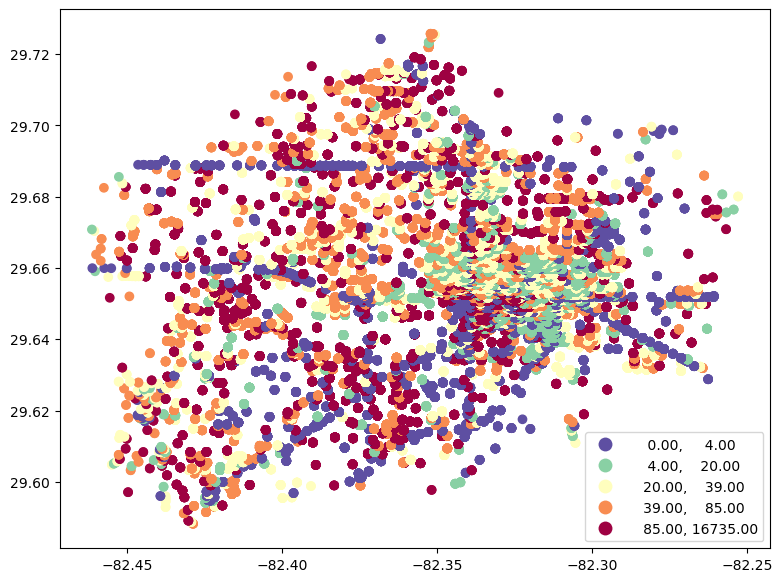

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))
origin.plot(ax=ax,column='job_pop', cmap='Spectral_r',legend=True,scheme="quantiles")
ct.add_basemap(ax, crs = 'EPSG:4326', source= ct.providers.CartoDB.Voyager)
plt.title('Number of jobs+Totalpop')

In [11]:
origin.job_pop.describe()

count    110860.000000
mean        105.957108
std         505.484892
min           0.000000
25%          10.000000
50%          28.000000
75%          66.000000
max       16735.000000
Name: job_pop, dtype: float64

<AxesSubplot: ylabel='Frequency'>

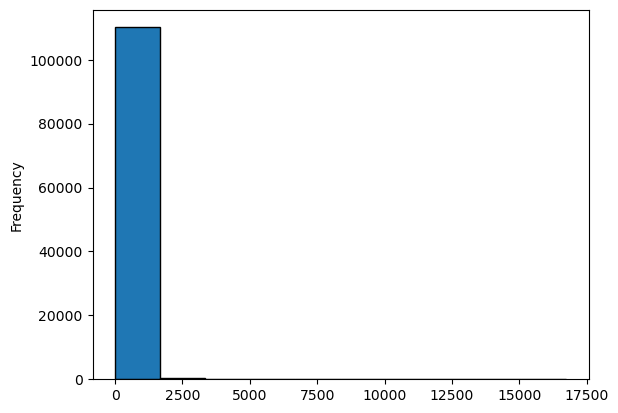

In [12]:
origin.job_pop.plot(kind='hist', edgecolor='black')

C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\mapclassify\classifiers.py:1775: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


NameError: name 'ct' is not defined

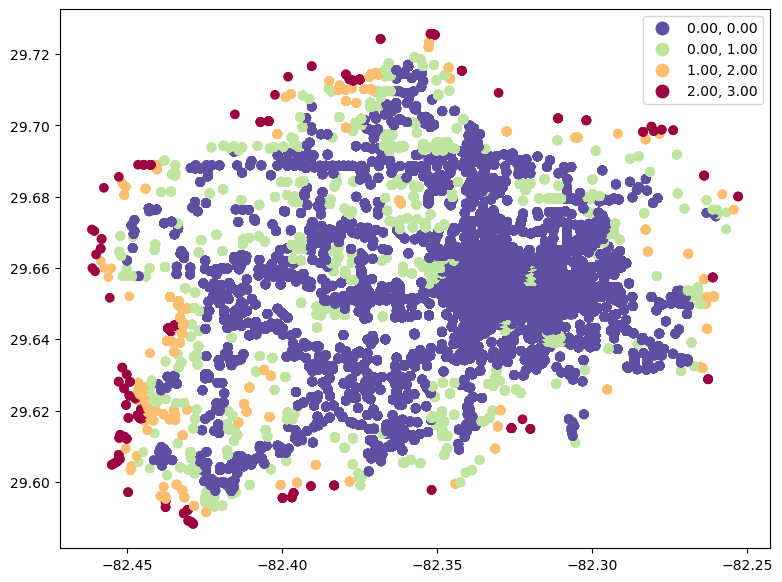

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))
origin.plot(ax=ax,column='recode', cmap='Spectral_r',legend=True,scheme="natural_breaks")
ct.add_basemap(ax, crs = 'EPSG:4326', source= ct.providers.CartoDB.Voyager)
plt.title('Distance to the nearest stop')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))
origin.plot(ax=ax,column='fmlm_score', cmap='Spectral_r',legend=True,scheme="natural_breaks")
ct.add_basemap(ax, crs = 'EPSG:4326', source= ct.providers.CartoDB.Voyager)
plt.title('FM/LM gap score')

4. Aggregated the total values to the spatial unit


In [13]:
sum_score=origin.groupby(['index'])['fmlm_score'].sum().reset_index()

In [14]:
sum_score

,index,fmlm_score
0,0,2821.0
1,1,0.0
2,2,302.0
3,3,703.0
4,4,376.0
...,...,...
624,624,3633.0
625,625,5935.0
626,626,6124.0
627,627,6076.0


5. merge with micromobility trip count

In [13]:
trip= gpd.read_file('process/transit.shp')

trip=trip.rename(columns={'Join_Count':'inner_scoo','Join_Cou_1':'inner_micr'})

new_df=trip.merge(sum_score, how='left', on='index')

new_df.to_file('process/result2.shp')

In [14]:
new_df.columns

,inner_scoo,TARGET_FID,inner_micr,TARGET_F_1,Route,total_trip,Total_Acti,W_C_TOTAL,BIKE_TOTAL,index,lat,lon,lat_1,lon_1,geometry,fmlm_score
0,11325,0,0,0,1.0,150.0,68.0,55.0,33.0,0,29.629470,-82.368050,0.0,0.0,"POLYGON ((-82.37880 29.63971, -82.37763 29.639...",2821.0
1,104852,1,0,1,9.0,1074.0,312.0,0.0,0.0,1,29.639612,-82.341515,0.0,0.0,"POLYGON ((-82.34559 29.65267, -82.34442 29.652...",0.0
2,124533,2,0,2,8.0,869.0,307.0,0.0,0.0,2,29.639612,-82.341515,0.0,0.0,"POLYGON ((-82.34274 29.65368, -82.34157 29.653...",302.0
3,68194,3,3338,3,14.0,720.0,3265.0,4325.0,1681.0,3,29.650175,-82.330467,0.0,0.0,"POLYGON ((-82.32270 29.66000, -82.32153 29.659...",703.0
4,155560,4,5,4,3.0,272.0,33.0,0.0,0.0,4,29.653282,-82.338799,0.0,0.0,"POLYGON ((-82.33943 29.65833, -82.33826 29.658...",376.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,5,624,0,624,2.0,36.0,4.0,0.0,2.0,624,29.634177,-82.413232,0.0,0.0,"POLYGON ((-82.42305 29.61599, -82.42421 29.615...",3633.0
625,0,625,0,625,2.0,24.0,2.0,0.0,0.0,625,0.000000,0.000000,0.0,0.0,"POLYGON ((-82.44091 29.65987, -82.44207 29.659...",5935.0
626,0,626,0,626,2.0,24.0,0.0,0.0,0.0,626,0.000000,0.000000,0.0,0.0,"POLYGON ((-82.44579 29.65807, -82.44696 29.658...",6124.0
627,0,627,0,627,2.0,24.0,0.0,0.0,0.0,627,0.000000,0.000000,0.0,0.0,"POLYGON ((-82.44591 29.64726, -82.44708 29.647...",6076.0


In [18]:
new_df[['index','fmlm_score']]

,index,fmlm_score
0,0,2821.0
1,1,0.0
2,2,302.0
3,3,703.0
4,4,376.0
...,...,...
624,624,3633.0
625,625,5935.0
626,626,6124.0
627,627,6076.0


In [17]:
new_df.fmlm_score.describe()

count      629.000000
mean      2237.930048
std       3920.214742
min          0.000000
25%        476.000000
50%       1222.000000
75%       3674.000000
max      86454.000000
Name: fmlm_score, dtype: float64